<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : Kasra Malihi & Mohammad Danial Jahanbani
### Student Number : 99105742 - 99105367
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

#### Loading the METABRIC dataset

In [1]:
import pandas as pd
METABRIC = pd.read_csv('METABRIC_RNA_Mutation.csv')
METABRIC.head(6)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


now we must split the dataset to three parts:
1.   Clinical Dataset
2.   Gene Expressions Dataset
3.   Gene Mutation Dataset


### Splitting METABRIC dataset to Clinical dataset:

In [2]:
clinical_dataset = METABRIC.filter(METABRIC.columns[:31], axis = 1)
clinical_dataset.head(6)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.062,IDC,7.800000,0,Positive,1,ER+/HER2- High Prolif,31.0,4.0,Died of Disease


In [3]:
clinical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

### Splitting METABRIC dataset to Gene mutation dataset:

In [4]:
gene_mutation_cols = [colname for colname in METABRIC.columns if colname.endswith("_mut")]
gene_mutation_dataset = METABRIC.filter(gene_mutation_cols, axis = 1)
gene_mutation_dataset.head(6)

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,H1047R,P67Qfs*56,0,0,0,0,A318T,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting METABRIC dataset to Gene expressions dataset:

In [5]:
gene_expressions_dataset = METABRIC.drop(gene_mutation_cols, axis = 1)
gene_expressions_dataset = gene_expressions_dataset.drop(clinical_dataset.columns , axis = 1)
gene_expressions_dataset['overall_survival'] = clinical_dataset['overall_survival']
gene_expressions_dataset.head(6)

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,1
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,1
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0
5,-0.4341,0.6931,0.6909,1.0840,-1.9371,0.9252,1.1520,0.7951,-0.9677,-0.7750,...,0.0395,0.8191,0.1977,-0.2302,-0.5092,-0.3021,0.9357,-0.4217,0.5340,0


## EDA

For each dataset, you must perform a sufficient EDA.

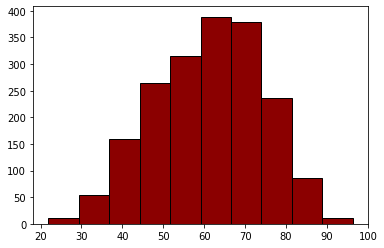

In [6]:
import matplotlib.pyplot as plt
import numpy as np
counts, bins = np.histogram(clinical_dataset['age_at_diagnosis'])

plt.hist(bins[:-1], bins, weights=counts, edgecolor='black', color='darkred')
plt.show()

Lets see which type of Cancer is more common:

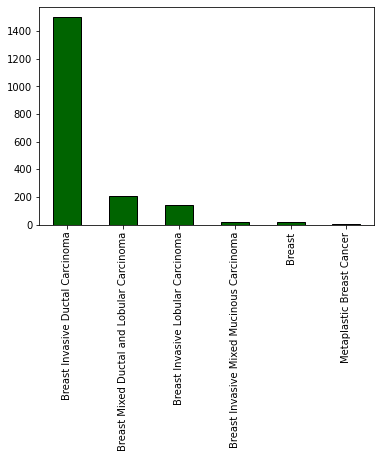

In [7]:
clinical_dataset['cancer_type_detailed'].value_counts().plot(kind='bar', edgecolor='black', color='darkgreen')

Each type of cancer is usually diagnosed in which range of age:

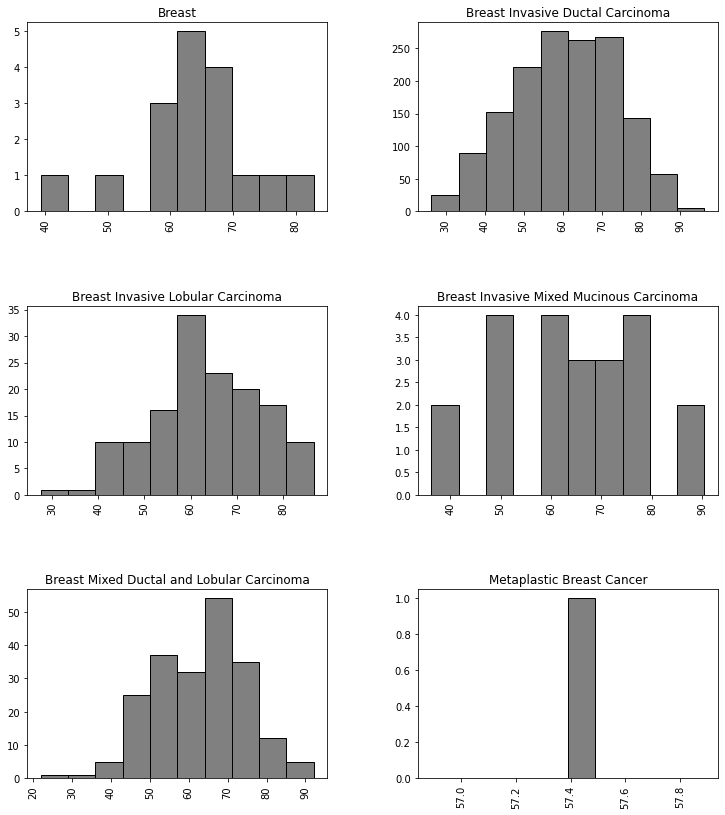

In [8]:

p3 = clinical_dataset['age_at_diagnosis'].hist(by=clinical_dataset['cancer_type_detailed'], figsize = (12,14), edgecolor = 'black', color='gray')


Here we can conclude that cancer diagnosis in earlier ages can help the survival chance, and it can be concluded that as expected patients with smaller tumors are more likely to survive

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

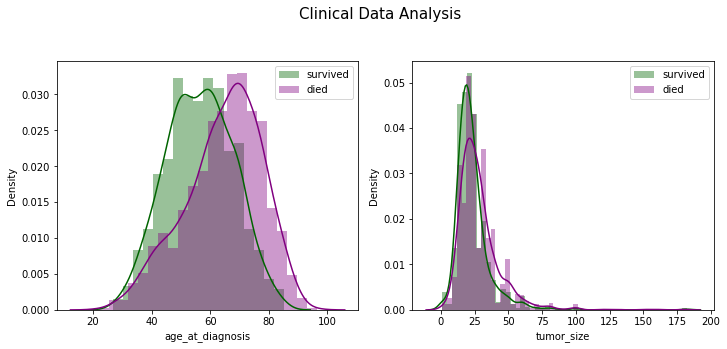

In [9]:
import seaborn as sns
fig = plt.figure(figsize = (20, 25))
j = 0
num_clinical_columns= ['age_at_diagnosis', 'tumor_size' ]
for i in clinical_dataset[num_clinical_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(clinical_dataset[i][clinical_dataset['overall_survival']==1], color='darkgreen', label = 'survived')
    sns.distplot(clinical_dataset[i][clinical_dataset['overall_survival']==0], color='purple', label = 'died')
    plt.legend(loc='best')

fig.suptitle('Clinical Data Analysis', x=0.21, horizontalalignment='left', verticalalignment='top', fontsize = 15)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

As its shown in plot below early diagnosis is very helpful

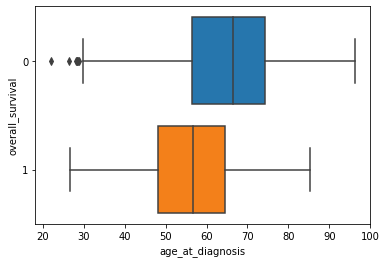

In [10]:
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_dataset, saturation=0.90)

fig.suptitle('The Distribution of Survival time in months and age with Target Attribute', fontsize = 18)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

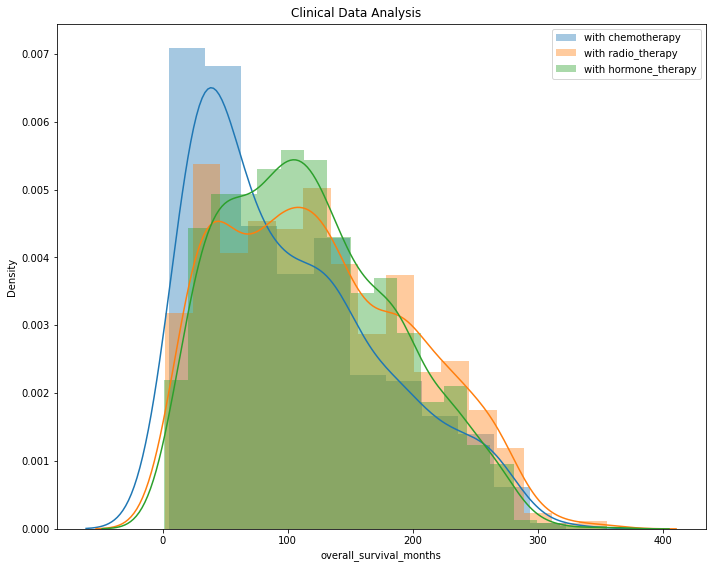

In [11]:
fig = plt.figure(figsize = (10, 8))
j = 0
num_clinical_columns= ['chemotherapy', 'radio_therapy', 'hormone_therapy']
for i in clinical_dataset[num_clinical_columns].columns:
    sns.distplot(clinical_dataset['overall_survival_months'][clinical_dataset[i]==1], label = 'with ' + i)
    plt.legend(loc='best')
    j += 1
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
sns.color_palette("flare", as_cmap=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


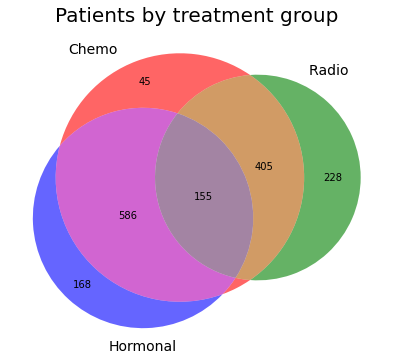

In [12]:
from matplotlib_venn import venn3
chemo = clinical_dataset[(clinical_dataset["chemotherapy"]==True) & (clinical_dataset["radio_therapy"]==False) & (clinical_dataset["hormone_therapy"]==False)]
radio = clinical_dataset[(clinical_dataset["chemotherapy"]==False) & (clinical_dataset["radio_therapy"]==True) & (clinical_dataset["hormone_therapy"]==False)]
hormonal = clinical_dataset[(clinical_dataset["chemotherapy"]==False) & (clinical_dataset["radio_therapy"]==False) & (clinical_dataset["hormone_therapy"]==True)]
chemo_radio = clinical_dataset[(clinical_dataset["chemotherapy"]==True) & (clinical_dataset["radio_therapy"]==True) & (clinical_dataset["hormone_therapy"]==False)]
radio_hormonal = clinical_dataset[(clinical_dataset["chemotherapy"]==False) & (clinical_dataset["radio_therapy"]==True) & (clinical_dataset["hormone_therapy"]==True)]
hormonal_chemo = clinical_dataset[(clinical_dataset["chemotherapy"]==True) & (clinical_dataset["radio_therapy"]==False) & (clinical_dataset["hormone_therapy"]==True)]
all_3 = clinical_dataset[(clinical_dataset["chemotherapy"]==True) & (clinical_dataset["radio_therapy"]==True) & (clinical_dataset["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(8,6))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6)

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Patients by treatment group", size=20)
plt.show()

## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

first we have to do some cleaning!

In [13]:
from pandas import DataFrame, factorize
cleaned_clinical = DataFrame()
for i in clinical_dataset.columns:

  cleaned_clinical[i] = clinical_dataset[i].fillna(clinical_dataset[i].mode()[0])

  if clinical_dataset[i].dtype not in ['int64', 'float64']:
    cleaned_clinical[i] = factorize(cleaned_clinical[i])[0]
cleaned_clinical = cleaned_clinical.drop(['death_from_cancer', 'patient_id'], axis=1)
cleaned_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   type_of_breast_surgery          1904 non-null   int64  
 2   cancer_type                     1904 non-null   int64  
 3   cancer_type_detailed            1904 non-null   int64  
 4   cellularity                     1904 non-null   int64  
 5   chemotherapy                    1904 non-null   int64  
 6   pam50_+_claudin-low_subtype     1904 non-null   int64  
 7   cohort                          1904 non-null   float64
 8   er_status_measured_by_ihc       1904 non-null   int64  
 9   er_status                       1904 non-null   int64  
 10  neoplasm_histologic_grade       1904 non-null   float64
 11  her2_status_measured_by_snp6    1904 non-null   int64  
 12  her2_status                     19

# 2D PCA

28 1904 28
0.9304405374012807
None
after reduction: 2 1904 28


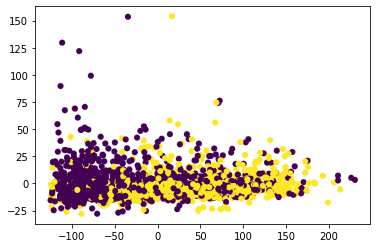

In [14]:
from sklearn.decomposition import PCA

y = cleaned_clinical['overall_survival'].copy()
X = cleaned_clinical.drop('overall_survival', axis=1)

pca = PCA().fit(X)
print(pca.n_components_, pca.n_samples_, pca.n_features_)
optimal_number_of_components = None
current_sum = 0;
for i in range(len(pca.explained_variance_ratio_)):
  print(pca.explained_variance_ratio_[i])
  current_sum += pca.explained_variance_ratio_[i]
  if(current_sum > 0.90):
        #finding the elbow
        #because elbow is where the rate of improvement starts to change f'(x) becomes smaller so
        #after reaching the elbow adding new components wont help us alot getting a better result
    print(optimal_number_of_components)
    optimal_number_of_components = i+1
    break

pca = PCA(optimal_number_of_components + 1).fit(X)
print('after reduction:', pca.n_components_, pca.n_samples_, pca.n_features_)
z = pca.transform(X)
plt.scatter(z[:, 0], z[:, 1], lw=0.1, c=y)
plt.show()

# 3D PCA

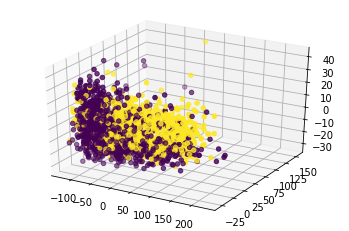

In [15]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

pca = PCA(3).fit(X)
z = pca.transform(X)
ax.scatter3D(z[:, 0], z[:, 1], z[:, 2], c=y);

# 2D TSNE

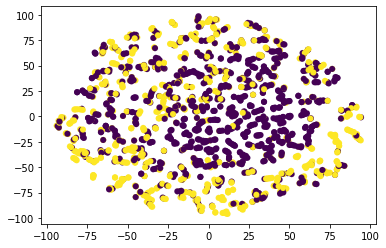

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
z = tsne.fit_transform(X)
plt.scatter(z[:, 0], z[:, 1], lw=0.1, c=y)
plt.show()

# 3D TSNE

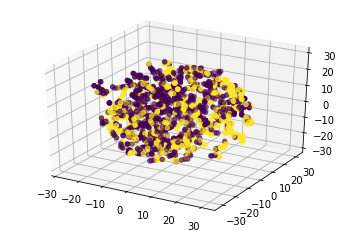

In [17]:
tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3)
z = tsne.fit_transform(X)

ax = plt.axes(projection='3d')
ax.scatter3D(z[:, 0], z[:, 1], z[:, 2], c=y);

the most important feature based on random forest regression is:  overall_survival_months


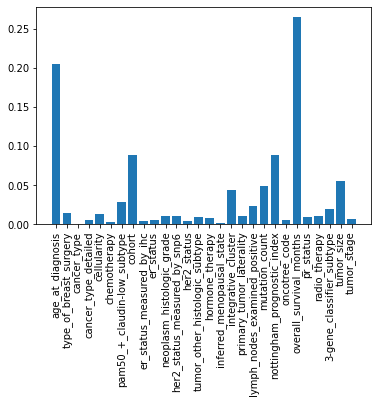

In [18]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
best_feature = ''
best_impo = 0
for name,imp in zip(X.columns, importance):
  if imp > best_impo:
    best_impo = imp
    best_feature = name
  #print(f'Feature: {name}, Score: %.5f' % (imp))
print('the most important feature based on random forest regression is: ', best_feature)
pyplot.bar([x for x in X], importance)
plt.xticks(rotation=90)
pyplot.show()

# Gene expression dimesnion reduction

In [19]:
gene_clean = DataFrame()
for i in gene_expressions_dataset.columns:

  gene_clean[i] = gene_expressions_dataset[i].fillna(gene_expressions_dataset[i].mode()[0])

  if gene_expressions_dataset[i].dtype not in ['int64', 'float64']:
    gene_clean[i] = factorize(gene_clean[i])[0]

<ipython-input-19-4862c196bc3c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  gene_clean[i] = gene_expressions_dataset[i].fillna(gene_expressions_dataset[i].mode()[0])


489 1904 489
None
after reduction: 161 1904 489


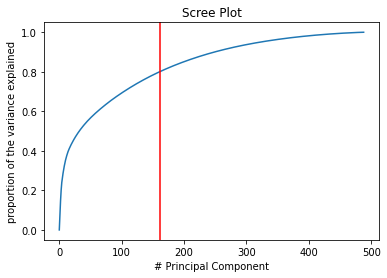

In [20]:
X_gene = gene_clean.drop('overall_survival', axis = 1)
y_gene = gene_clean['overall_survival']
pca_gene = PCA().fit(X_gene)
print(pca_gene.n_components_, pca_gene.n_samples_, pca_gene.n_features_)
optimal_number_of_components = None
current_sum = 0;
explained_variance_ratio_sum = [sum(pca_gene.explained_variance_ratio_[:i]) for i in range(len(pca_gene.explained_variance_ratio_))]
for i in range(len(pca_gene.explained_variance_ratio_)):
  current_sum += pca_gene.explained_variance_ratio_[i]
  if(current_sum > 0.80):
        #finding the elbow
        #because elbow is where the rate of improvement starts to change f'(x) becomes smaller so
        #after reaching the elbow adding new components wont help us alot getting a better result
    print(optimal_number_of_components)
    optimal_number_of_components = i+1
    break

plt.plot(explained_variance_ratio_sum,)
plt.axvline(optimal_number_of_components, color = 'red')
plt.title('Scree Plot')
plt.xlabel('# Principal Component')
plt.ylabel('proportion of the variance explained')

pca_gene = PCA(optimal_number_of_components).fit(X_gene)
print('after reduction:', pca_gene.n_components_, pca_gene.n_samples_, pca_gene.n_features_)
transformed_gene_x = pca_gene.transform(X_gene)

# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

we use the following function to fit a random forest on different datasets:

In [45]:
acc_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

def construct_tree(dataset, dataset_name):
  X = dataset.drop('overall_survival', axis=1)
  y = dataset['overall_survival']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  param_grid = {'max_depth': [i for i in range(5, 25, 5)], 
                'criterion': ['gini', 'entropy'],
                'n_estimators': [i for i in range(50, 100, 10)]
                }
  grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5)
  # fitting the model for grid search
  grid.fit(X_train, y_train)
  print(grid.best_params_)

  clf = RandomForestClassifier(**grid.best_params_)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  ps = precision_score(y_test, y_pred)
  precision_dict.update({dataset_name:ps})
  rs = recall_score(y_test, y_pred)
  recall_dict.update({dataset_name:rs})
  fs = f1_score(y_test, y_pred)
  f1_dict.update({dataset_name:fs})
  acs = accuracy_score(y_test, y_pred)
  acc_dict.update({dataset_name:acs})

  print('precision:', ps, 'recall: ', rs, 'fscore:', fs, '\naccuracy:', acs)

  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix, annot=True, fmt='d')
  plot_roc_curve(clf, X_test, y_test)  
  plt.show()      

  return clf

###Training using clinical dataset

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
precision: 0.7478632478632479 recall:  0.6782945736434108 fscore: 0.7113821138211384 
accuracy: 0.7742448330683624


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


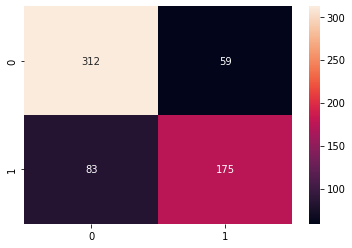

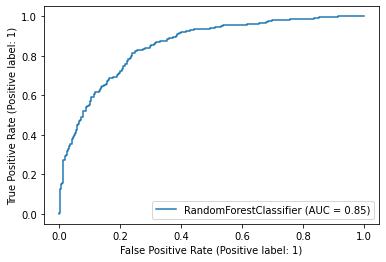

In [53]:
clinical_clf = construct_tree(cleaned_clinical, 'clinical_dataset')

### Training using reduced gene expressions dataset

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 90}
precision: 0.5798816568047337 recall:  0.3798449612403101 fscore: 0.45901639344262296 
accuracy: 0.6327503974562798


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


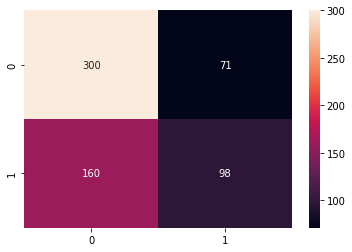

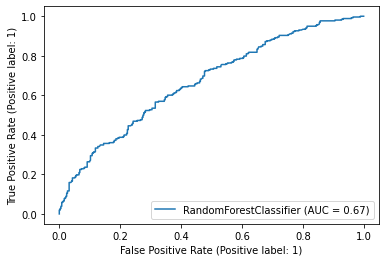

In [54]:
clean_gene_clf = construct_tree(gene_clean, 'gene_expression_dataset')

### Training using actual gene expressions dataset

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}
precision: 0.6111111111111112 recall:  0.2558139534883721 fscore: 0.36065573770491804 
accuracy: 0.6279809220985691


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


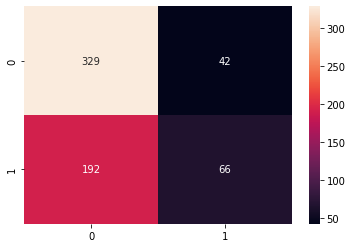

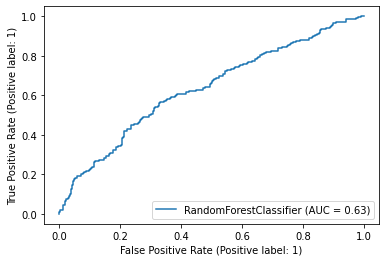

In [55]:
reduced_gene = pd.DataFrame(transformed_gene_x, columns = [i for i in range(transformed_gene_x.shape[1])])
reduced_gene['overall_survival'] = gene_clean['overall_survival']
gene_clf = construct_tree(reduced_gene, 'reduced_gene_dataset')

# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

###defining NN model
we use the following architecture to build our neural network:


*   Linear(*input_size*, *1024*)
*   ReLU
*   Linear(*1024*, *256*)
*   ReLU
*   Linear(*256*, *2*)



In [28]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
import numpy as np
from tqdm import tqdm

def linear_relu(dim_in, dim_out):
    return [nn.Linear(dim_in, dim_out), nn.ReLU(inplace=True)]

class ClassifierModel(nn.Module):
    def __init__(self, input_size, number_of_classes):
      self.input_size = input_size
      super(ClassifierModel, self).__init__()
      self.classifier = nn.Sequential(
          *linear_relu(input_size, 1024),
          *linear_relu(1024, 256),
          nn.Linear(256, number_of_classes)
        )


    def forward(self, x):
      x = x.view(-1, self.input_size)
      y = self.classifier(x)
      return y

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Loaders

In [30]:
def loader_function(dataset):
  num_threads = 2
  batch_size  = 128
  nb_train_val = int(0.7 * len(dataset))
  nb_test =  len(dataset) - nb_train_val
  train_val_set, test_set = torch.utils.data.random_split(dataset, [nb_train_val, nb_test])
  nb_train = int(0.8 * len(train_val_set))
  nb_val = len(train_val_set) - nb_train
  train_set, val_set = torch.utils.data.random_split(train_val_set, [nb_train, nb_val])
  train_loader = torch.utils.data.DataLoader(dataset=train_set,batch_size=batch_size, shuffle=True, num_workers=num_threads)
  valid_loader = torch.utils.data.DataLoader(dataset=val_set,batch_size=batch_size, shuffle=False,num_workers=num_threads)
  test_loader = torch.utils.data.DataLoader(dataset=test_set,batch_size=batch_size,shuffle=False,num_workers=num_threads)
  return train_loader, valid_loader, test_loader

Train and Validation functions:

In [31]:
def test(model, loader, f_loss, device):
    with torch.no_grad():
        model.eval()
        N = 0
        tot_loss, correct = 0.0, 0.0
        for i, (inputs, targets) in enumerate(loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            N += inputs.shape[0]
            tot_loss += inputs.shape[0] * f_loss(outputs, targets).item()
            predicted_targets = outputs.argmax(dim=1)
            correct += (predicted_targets == targets).sum().item()
        return tot_loss/N, correct/N

In [32]:
def train(model, loader, f_loss, optimizer, device):
    model.train()
    for i, (inputs, targets) in enumerate(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = f_loss(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Training the Network:

In [33]:
class DatasetCreator(Dataset):
    def __init__(self, X, y):
      self.y = y
      self.X = X.to_numpy()

    def __len__(self):
      return len(self.y)

    def __getitem__(self, index):
      x = torch.tensor(self.X[index])
      x = x.to(torch.float32)
      target = torch.tensor(self.y[index])
      target = target.to(torch.float32)
      target = target.type(torch.LongTensor) 
      return x, target

In [34]:
def get_model(dataset):
  num_class = 2
  d, t = dataset[0]
  input_size = d.shape[0]
  model = ClassifierModel(input_size, num_class).to(device)
  optimizer = torch.optim.Adam(model.parameters())
  f_loss = torch.nn.CrossEntropyLoss()
  return model, optimizer, f_loss


In [56]:
acc_dict_nn = {}
precision_dict_nn = {}
recall_dict_nn = {}
f1_dict_nn = {}

In [57]:
def run_nn(X, y, dataset_name):
  val_loss_list = []
  val_acc_list = []
  train_loss_list = []
  train_acc_list = []
  val_loss_min = np.Inf
  epochs = 25
  dataset = DatasetCreator(X, y)

  train_loader, valid_loader, test_loader = loader_function(dataset)
  model, optimizer, f_loss = get_model(dataset)

  for t in range(epochs):
    print("Epoch {}".format(t+1))
    train(model, train_loader, f_loss, optimizer, device)
    val_loss, val_acc = test(model, valid_loader, f_loss, device)
    train_loss, train_acc = test(model, train_loader, f_loss, device)
    if (val_loss < val_loss_min):
      val_loss_min = val_loss
      torch.save(model.state_dict(),'model.pt')
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(" Training : Loss : {:.4f}, Acc : {:.4f}".format(train_loss, train_acc))
    print(" Validation : Loss : {:.4f}, Acc : {:.4f}".format(val_loss, val_acc))
  
  model.load_state_dict(torch.load('model.pt'))
  loss = 0
  true_predict = 0
  y_true = []
  y_pred = []
  for (data, label) in test_loader:
    output = model(data.to(device))
    pred = torch.argmax(output, dim = 1)
    y_true.append(list(label.cpu().numpy()))
    y_pred.append(list(pred.cpu().numpy()))
    true_predict += torch.sum(pred == label.to(device)).item()
  accuracy = true_predict / len(test_loader.sampler)
  print(f'\n\nAccuracy on {dataset_name}: {accuracy}')
  from itertools import chain
  y_true = list(chain.from_iterable(y_true))
  y_pred = list(chain.from_iterable(y_pred))
  ps = precision_score(y_true, y_pred)
  precision_dict_nn[dataset_name] = ps
  rs = recall_score(y_true, y_pred)
  recall_dict_nn[dataset_name] = rs
  fs = f1_score(y_true, y_pred)
  f1_dict_nn[dataset_name] = fs
  acs = accuracy_score(y_true, y_pred)
  acc_dict_nn[dataset_name] = acs

  print('precision:', ps, 'recall: ', rs, 'fscore:', fs)
  from sklearn.metrics import confusion_matrix
  cf_matrix = confusion_matrix(y_true, y_pred)
  import seaborn as sns
  sns.heatmap(cf_matrix, annot=True, fmt='d')

###Training the model on clinical dataset:

Epoch 1
 Training : Loss : 1.8340, Acc : 0.6554
 Validation : Loss : 1.6279, Acc : 0.6479
Epoch 2
 Training : Loss : 1.9974, Acc : 0.6535
 Validation : Loss : 1.7844, Acc : 0.6479
Epoch 3
 Training : Loss : 1.0408, Acc : 0.5840
 Validation : Loss : 1.0467, Acc : 0.5880
Epoch 4
 Training : Loss : 0.6138, Acc : 0.6854
 Validation : Loss : 0.5929, Acc : 0.7079
Epoch 5
 Training : Loss : 0.6522, Acc : 0.7127
 Validation : Loss : 0.6026, Acc : 0.7266
Epoch 6
 Training : Loss : 0.6414, Acc : 0.6958
 Validation : Loss : 0.6028, Acc : 0.7079
Epoch 7
 Training : Loss : 0.5630, Acc : 0.7108
 Validation : Loss : 0.5451, Acc : 0.7228
Epoch 8
 Training : Loss : 0.5542, Acc : 0.7099
 Validation : Loss : 0.5427, Acc : 0.7154
Epoch 9
 Training : Loss : 0.5341, Acc : 0.7211
 Validation : Loss : 0.5325, Acc : 0.7378
Epoch 10
 Training : Loss : 0.5277, Acc : 0.7239
 Validation : Loss : 0.5336, Acc : 0.7416
Epoch 11
 Training : Loss : 0.5250, Acc : 0.7258
 Validation : Loss : 0.5328, Acc : 0.7341
Epoch 12

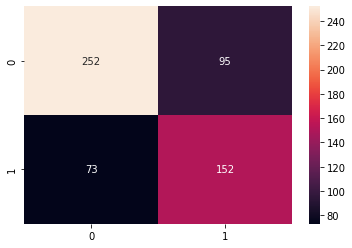

In [58]:
X = cleaned_clinical.drop('overall_survival', axis = 1)
y = cleaned_clinical['overall_survival']
run_nn(X, y, 'Clinical Dataset')

###Training the model on actual gene dataset:

Epoch 1
 Training : Loss : 0.5555, Acc : 0.6995
 Validation : Loss : 0.6139, Acc : 0.6479
Epoch 2
 Training : Loss : 0.3824, Acc : 0.8291
 Validation : Loss : 0.6037, Acc : 0.6891
Epoch 3
 Training : Loss : 0.2281, Acc : 0.9277
 Validation : Loss : 0.7417, Acc : 0.6180
Epoch 4
 Training : Loss : 0.1505, Acc : 0.9568
 Validation : Loss : 0.8778, Acc : 0.6517
Epoch 5
 Training : Loss : 0.0538, Acc : 0.9915
 Validation : Loss : 1.0823, Acc : 0.6479
Epoch 6
 Training : Loss : 0.0292, Acc : 0.9981
 Validation : Loss : 1.4027, Acc : 0.5993
Epoch 7
 Training : Loss : 0.0120, Acc : 0.9991
 Validation : Loss : 1.5277, Acc : 0.6479
Epoch 8
 Training : Loss : 0.0048, Acc : 1.0000
 Validation : Loss : 1.7491, Acc : 0.6067
Epoch 9
 Training : Loss : 0.0028, Acc : 1.0000
 Validation : Loss : 1.7527, Acc : 0.6554
Epoch 10
 Training : Loss : 0.0016, Acc : 1.0000
 Validation : Loss : 1.8810, Acc : 0.6367
Epoch 11
 Training : Loss : 0.0009, Acc : 1.0000
 Validation : Loss : 1.9699, Acc : 0.6292
Epoch 12

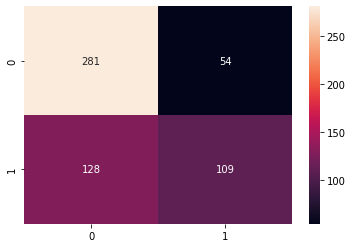

In [59]:
X = gene_clean.drop('overall_survival', axis = 1)
y = gene_clean['overall_survival']
run_nn(X, y, 'gene expression Dataset')

###Training the model on reduced gene dataset:

Epoch 1
 Training : Loss : 0.5556, Acc : 0.7380
 Validation : Loss : 0.6231, Acc : 0.6629
Epoch 2
 Training : Loss : 0.4537, Acc : 0.7944
 Validation : Loss : 0.6105, Acc : 0.7041
Epoch 3
 Training : Loss : 0.3692, Acc : 0.8366
 Validation : Loss : 0.6456, Acc : 0.6854
Epoch 4
 Training : Loss : 0.2672, Acc : 0.8995
 Validation : Loss : 0.7142, Acc : 0.6742
Epoch 5
 Training : Loss : 0.1667, Acc : 0.9606
 Validation : Loss : 0.8069, Acc : 0.6667
Epoch 6
 Training : Loss : 0.0872, Acc : 0.9887
 Validation : Loss : 0.9518, Acc : 0.6629
Epoch 7
 Training : Loss : 0.0370, Acc : 0.9991
 Validation : Loss : 1.1112, Acc : 0.6592
Epoch 8
 Training : Loss : 0.0185, Acc : 1.0000
 Validation : Loss : 1.2632, Acc : 0.6442
Epoch 9
 Training : Loss : 0.0085, Acc : 1.0000
 Validation : Loss : 1.3907, Acc : 0.6255
Epoch 10
 Training : Loss : 0.0039, Acc : 1.0000
 Validation : Loss : 1.4681, Acc : 0.6367
Epoch 11
 Training : Loss : 0.0025, Acc : 1.0000
 Validation : Loss : 1.5570, Acc : 0.6292
Epoch 12

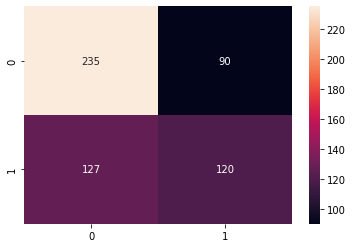

In [60]:
X = transformed_gene_x
df = pd.DataFrame(X, columns = [i for i in range(X.shape[1])])
y = gene_clean['overall_survival']
run_nn(df, y, 'Reduced gene expression Dataset')

# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

As it was shown in above examples it can be concluded that Nueral networks are better for classification and also Clinical dataset gives us more valueable information than the gene expression dataset

[Text(0, 0, 'clinical_dataset'),
 Text(0, 0, 'gene_expression_dataset'),
 Text(0, 0, 'reduced_gene_dataset')]

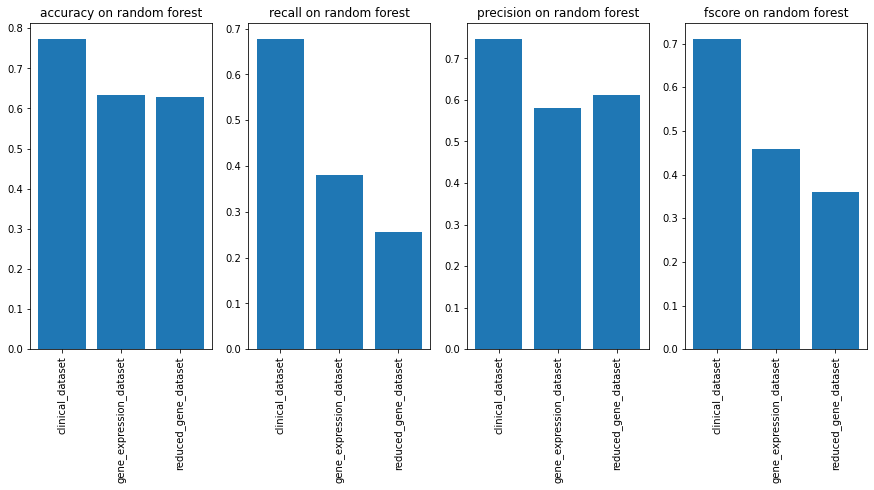

In [96]:
fig, axs = plt.subplots(1,4)
fig.set_size_inches(15,6)

axs[0].bar([x for x in acc_dict.keys()], acc_dict.values())
axs[0].set_title('accuracy on random forest')
axs[0].set_xticklabels([x for x in acc_dict.keys()], rotation=90)

axs[1].bar([x for x in recall_dict.keys()], recall_dict.values())
axs[1].set_title('recall on random forest')
axs[1].set_xticklabels([x for x in recall_dict.keys()], rotation=90)

axs[2].bar([x for x in precision_dict.keys()], precision_dict.values())
axs[2].set_title('precision on random forest')
axs[2].set_xticklabels([x for x in precision_dict.keys()], rotation=90)

axs[3].bar([x for x in f1_dict.keys()], f1_dict.values())
axs[3].set_title('fscore on random forest')
axs[3].set_xticklabels([x for x in f1_dict.keys()], rotation=90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

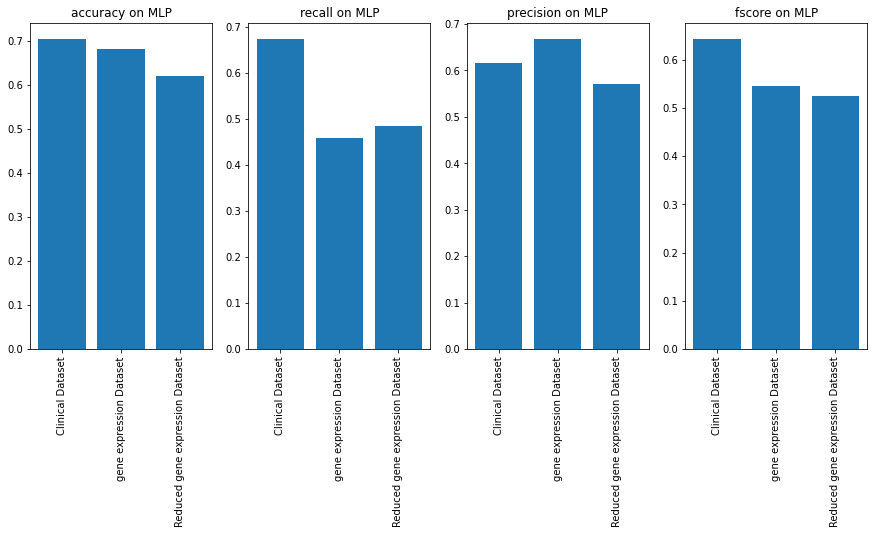

In [97]:
fig, axs = plt.subplots(1,4)
fig.set_size_inches(15,6)

axs[0].bar([x for x in acc_dict_nn.keys()], acc_dict_nn.values())
axs[0].set_title('accuracy on MLP')
axs[0].set_xticklabels([x for x in acc_dict_nn.keys()], rotation=90)

axs[1].bar([x for x in recall_dict_nn.keys()], recall_dict_nn.values())
axs[1].set_title('recall on MLP')
axs[1].set_xticklabels([x for x in recall_dict_nn.keys()], rotation=90)

axs[2].bar([x for x in precision_dict_nn.keys()], precision_dict_nn.values())
axs[2].set_title('precision on MLP')
axs[2].set_xticklabels([x for x in precision_dict_nn.keys()], rotation=90)

axs[3].bar([x for x in f1_dict_nn.keys()], f1_dict_nn.values())
axs[3].set_title('fscore on MLP')
axs[3].set_xticklabels([x for x in f1_dict_nn.keys()], rotation=90)
plt.xticks(rotation=90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

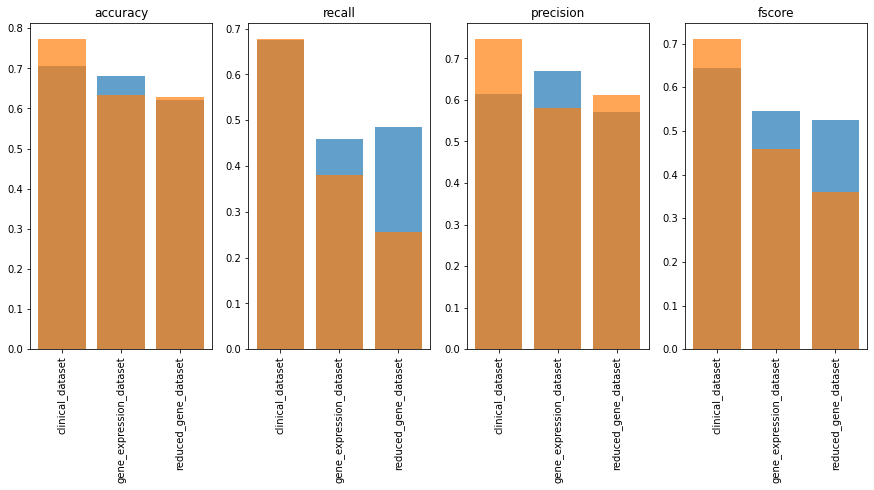

In [102]:
fig, axs = plt.subplots(1,4)
fig.set_size_inches(15,6)

axs[0].bar([x for x in acc_dict.keys()], acc_dict_nn.values(), alpha= 0.7)
axs[0].bar([x for x in acc_dict.keys()], acc_dict.values(), alpha= 0.7)
axs[0].set_xticklabels([x for x in acc_dict.keys()], rotation=90)
axs[0].set_title('accuracy')

axs[1].bar([x for x in recall_dict.keys()], recall_dict_nn.values(), alpha= 0.7)
axs[1].bar([x for x in recall_dict.keys()], recall_dict.values(), alpha= 0.7)
axs[1].set_xticklabels([x for x in recall_dict.keys()], rotation=90)
axs[1].set_title('recall')

axs[2].bar([x for x in precision_dict.keys()], precision_dict_nn.values(), alpha= 0.7)
axs[2].bar([x for x in precision_dict.keys()], precision_dict.values(), alpha= 0.7)
axs[2].set_xticklabels([x for x in precision_dict.keys()], rotation=90)
axs[2].set_title('precision')

axs[3].bar([x for x in f1_dict.keys()], f1_dict_nn.values(), alpha= 0.7)
axs[3].bar([x for x in f1_dict.keys()], f1_dict.values(), alpha= 0.7)
axs[3].set_xticklabels([x for x in f1_dict.keys()], rotation=90)
axs[3].set_title('fscore')
plt.xticks(rotation=90)